<a href="https://colab.research.google.com/github/DressaLuc/titanic-survival-analysis/blob/main/titanic_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados - Titanic Dataset

Este notebook realiza uma análise exploratória, como foco em:

- limpeza e tratamento de dados;
- substituição de valores nulos;
- Análise de distribuição e sobrevivência;
- Visualização gráfica com Seaborn e Matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Saving train.csv to train (1).csv


## 1. Importação e visualização inicial dos dados


In [ ]:

df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
df.describe(include='all')


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2. Verificação de Valores ausentes

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 3. Criação de novo DataFrame e renomeação de colunas

In [ ]:
df_novo = df[['Name', 'Sex', 'Pclass', 'Fare', 'Age', 'Survived']].copy()

df_novo.rename(columns={
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Pclass': 'Classe',
    'Fare': 'Tarifa',
    'Age': 'Idade',
    'Survived': 'Sobreviveu'
}, inplace=True)

print(df_novo.info())
print(df_novo.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nome        891 non-null    object 
 1   Sexo        891 non-null    object 
 2   Classe      891 non-null    int64  
 3   Tarifa      891 non-null    float64
 4   Idade       714 non-null    float64
 5   Sobreviveu  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB
None
Nome            0
Sexo            0
Classe          0
Tarifa          0
Idade         177
Sobreviveu      0
dtype: int64


## 4. Tratamento de valores nulos em "Idade"
Substituição dos valores nulos pela mediana, para evitar distorções causadas por outliers

In [ ]:
print("Nulos antes:", df_novo['Idade'].isna().sum())
mediana_idade = df_novo['Idade'].isna().sum()
df_novo['Idade'] = df_novo['Idade'].fillna(mediana_idade)
print("Nulos depois:"), df_novo['Idade'].isna().sum()

Nulos antes: 177
Nulos depois:


(None, np.int64(0))

## 5. Análise exploratória das Idades
Distribuições e boxplots para observar o perfil dos passageiros

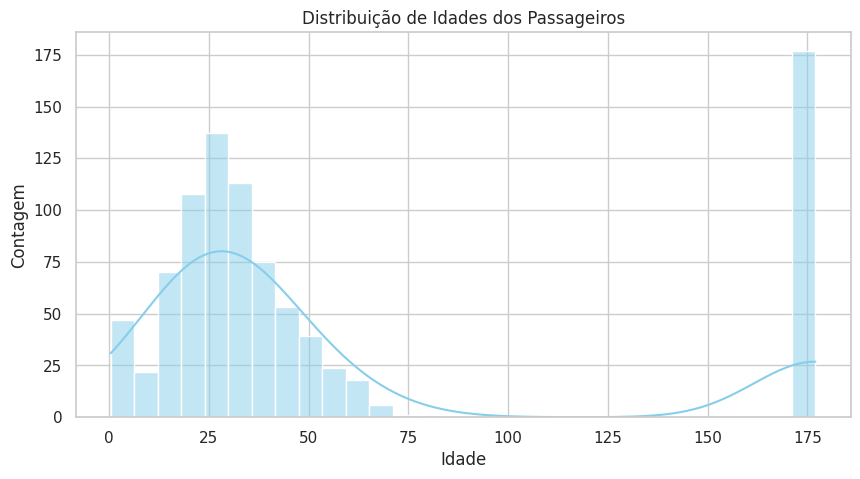

/tmp/ipython-input-782985174.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Idade', data=df_novo, palette='Set2')


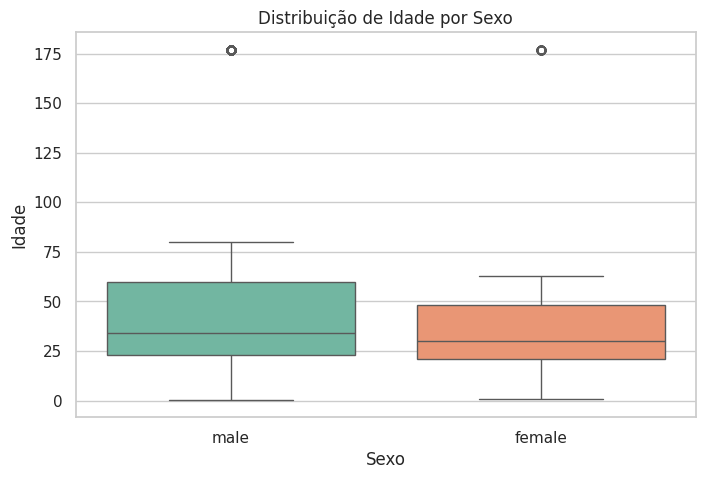

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,5))
sns.histplot(df_novo['Idade'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Sexo', y='Idade', data=df_novo, palette='Set2')
plt.title('Distribuição de Idade por Sexo')
plt.show()

## 6. Análise de sobrevivência por faixa etária

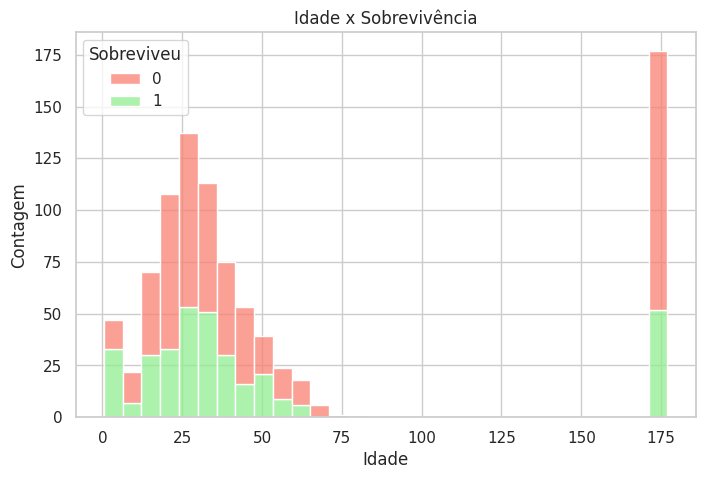

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_novo, x='Idade', hue='Sobreviveu', multiple='stack', bins=30, palette=["salmon", "lightgreen"])
plt.title("Idade x Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

## 7. Agrupamentos e estatísticas por Sexo e Sobrevivência

In [ ]:
df_novo['Sexo'].replace({'male': 'homem', 'female' : 'mulher'}, inplace=True)

print("Resumo por Sexo:")
print(df_novo.groupby('Sexo')[['Classe', 'Tarifa', 'Idade', 'Sobreviveu']].agg(['mean', 'max', 'min']))

print("\nResumo por Sobrevivência:")
print(df_novo.groupby('Sobreviveu')[['Classe', 'Tarifa', 'Idade', 'Sobreviveu']].agg(['mean', 'max', 'min']))

Resumo por Sexo:
          Classe             Tarifa                      Idade               \
            mean max min       mean       max   min       mean    max   min   
Sexo                                                                          
homem   2.389948   3   1  25.523893  512.3292  0.00  62.161473  177.0  0.42   
mulher  2.159236   3   1  44.479818  512.3292  6.75  53.079618  177.0  0.75   

       Sobreviveu          
             mean max min  
Sexo                       
homem    0.188908   1   0  
mulher   0.742038   1   0  

Resumo por Sobrevivência:
              Classe             Tarifa                     Idade         \
                mean max min       mean       max  min       mean    max   
Sobreviveu                                                                 
0           2.531876   3   1  22.117887  263.0000  0.0  63.953552  177.0   
1           1.950292   3   1  48.395408  512.3292  0.0  50.946404  177.0   

                 Sobreviveu          
 

## 8. Tabela cruzada de sobrevivência por sexo

In [ ]:
tabela = pd.crosstab(df_novo['Sobreviveu'], df_novo['Sexo'])
tabela.style.background_gradient(cmap='OrRd')

Sexo,homem,mulher
Sobreviveu,,
0,468,81
1,109,233


## 9. Análise da coluna "Cabine"

Tratamento, extração da primeira letra  e análise de distribuição

In [ ]:
df_cabine = df[['Name', 'Sex', 'Pclass', 'Fare', 'Age', 'Survived', 'Cabin']].copy()

df_cabine.rename(columns={
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Pclass': 'Classe',
    'Fare': 'Tarifa',
    'Age': 'Idade',
    'Survived': 'Sobreviveu',
    'Cabin': 'Cabine'
}, inplace=True)

df_cabine['Cabine'] = df_cabine['Cabine'].apply(lambda x: str(x)[0] if pd.notnull(x) else np.nan)
print(df_cabine['Cabine'].value_counts(dropna=False))

Cabine
NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: count, dtype: int64


## 10. Visualização - Distribuição das cabines

/tmp/ipython-input-1568772865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cabine_counts.index, y=cabine_counts.values, palette='viridis')


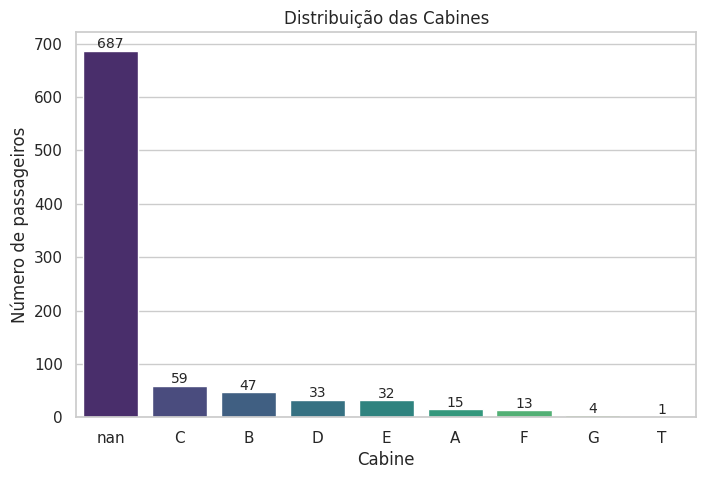

In [ ]:
cabine_counts = df_cabine['Cabine'].value_counts(dropna=False)
cabine_counts.index = cabine_counts.index.astype(str)

plt.figure(figsize=(8,5))
sns.barplot(x=cabine_counts.index, y=cabine_counts.values, palette='viridis')
plt.title('Distribuição das Cabines')
plt.xlabel('Cabine')
plt.ylabel('Contagem')
plt.ylabel('Número de passageiros')

for i, v in enumerate(cabine_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.show()

## 11. Sobrevivência por Cabine

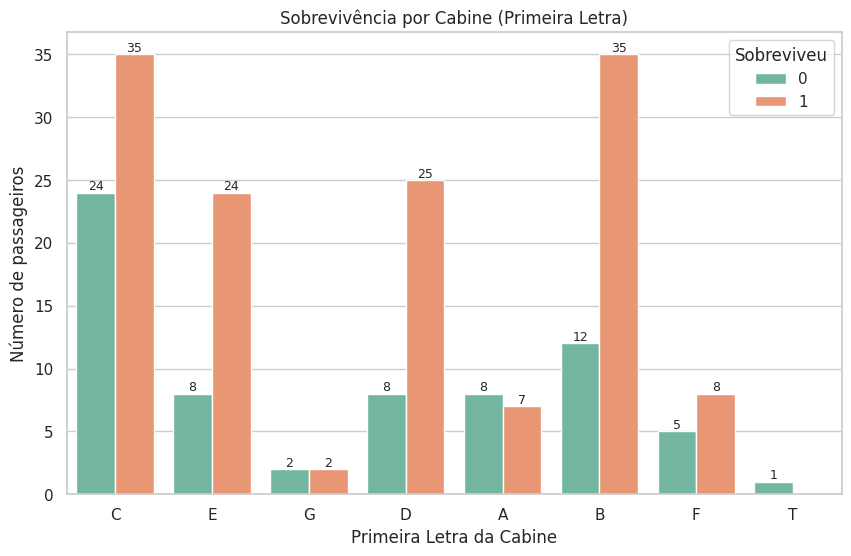

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cabine, x='Cabine', hue='Sobreviveu', palette='Set2')
plt.title('Sobrevivência por Cabine (Primeira Letra)')
plt.xlabel('Primeira Letra da Cabine')
plt.ylabel('Número de passageiros')

for container in plt.gca().containers:
    plt.bar_label(container, fontsize=9)
plt.show()

## 12. Conclusões

  - O conjunto de dados foi limpo e valores ausentes em 'Idade' foram substituídos pela mediana;
  - A análise mostrou diferenças claras de sobrevivência entre homens e mulheres;
  - Algumas cabines parecem associadas a taxas de sobrevivência mais altas.